<a href="https://colab.research.google.com/github/hseongeun/projectmanager/blob/main/9_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 복습
car.xlsx 파일을 열어봅시다.

In [2]:
import pandas as pd
df = pd.read_excel('car.xlsx')
df

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570
...,...,...,...,...,...,...
269,235000,Avante,390,2007,1473730,507260
270,140000,Avante,430,2009,14399366,4592589
271,96757,Avante,390,2006,303080,0
272,113853,Avante,390,2008,320780,1857718


'mileage'의 기술 통계
- 평균
- 중간값
-표준편차

In [3]:
df['mileage'].mean()   # 평균

77483.22262773722

In [4]:
df['mileage'].median()    # 중간값

71649.0

<Axes: xlabel='mileage'>

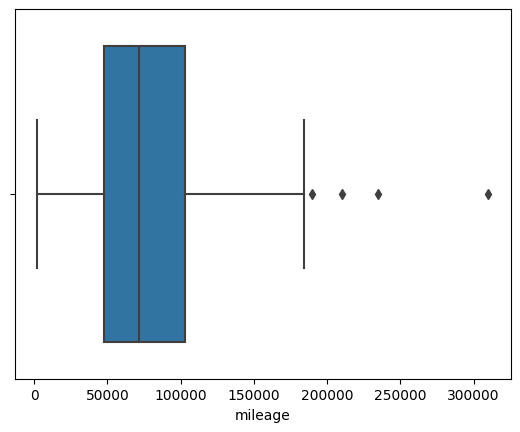

In [6]:
import seaborn as sns
sns.boxplot(x='mileage', data = df)

In [5]:
df['mileage'].std()   # 표준편차

43015.79445317075

In [7]:
df.mileage.describe()   # 기술통계 모두 구하기

count       274.000000
mean      77483.222628
std       43015.794453
min        2287.000000
25%       47597.500000
50%       71649.000000
75%      103193.750000
max      310000.000000
Name: mileage, dtype: float64

'mileage'의 95% 신뢰구간

In [9]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=c0f7e62af1395ae9fdbd353143b9f4d8c92cba87a2c324251f77265877d78f4d
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [11]:
import pingouin as pg
pg.ttest(df.mileage, 0, confidence = .95)
# 모집단에서 전수조사를 한다면 평균은 72367~82599 사이에 나올 것이다.
# 구간은 좁히려면(=오차범위를 줄이려면) 데이터를 더 많이 모으면 됨

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,29.816386,273,two-sided,7.513310e-88,"[72367.22, 82599.22]",1.801274,1.384e+84,1.0


### 신뢰구간의 문제점
- 계산을 최소한 두 번은 해야함
- 계산에 어려운 이론이 필요(이론이 없으면 시뮬레이션을 아주 많이 해야함)
--> p-value 등장

In [15]:
pg.ttest(df.price, 800, confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.670492,273,two-sided,0.008028,"[814.1, 893.22]",0.16133,2.205,0.758389


In [16]:
0.008<0.05

True

- p-value < 유의수준: 가정된 모수가 신뢰구간을 벗어남 = 신뢰구간에 포함 X

- p-value > 유의수준: 가정된 모수가 신뢰구간을 벗어남 = 신뢰구간에 포함 O

In [17]:
avante = df.price[df.model == 'Avante']  # Avante인 차량의 가격
avante

69     1099
70     1099
71     1099
72      690
73      820
       ... 
269     390
270     430
271     390
272     390
273     350
Name: price, Length: 205, dtype: int64

In [18]:
k3 = df.price[df.model == 'K3']  # K3인 차량의 가격
k3

0      970
1     1130
2     1380
3     1390
4      760
      ... 
64     760
65     930
66     760
67    1000
68    1290
Name: price, Length: 69, dtype: int64

In [20]:
avante.mean()

833.4146341463414

In [21]:
k3.mean()

913.8115942028985

In [19]:
# 전수조사를 했을 때도 k3가 더 비쌀 것인가 -> t검정 실행
pg.ttest(avante, k3, confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


Avante 평균 - K3 평균의 95% 신뢰구간이 -152 ~ -8

-> 모집단에서 Avante의 평균이 K3의 평균보다 낮다는 결론

---
<p-value 이용>

귀무가설(기각할 가설) : 둘이 똑같다고 가정

0.028187 < 0.05 (신뢰수준이 95%라 0.05와 비교)

귀무가설 기각 -> 둘은 평균이 다르다

---
'통계적으로 유의한 차이' (Avante와 K3의 차이를 확인할 수 있을 만큼 데이터가 충분)

귀무가설 기각 X -> 둘의 평균이 같다(X)

-> Avante가 더 비쌀 수도, K3가 더 비쌀수도 있다.

---
신뢰수준(or 유의수준)은 감당할 수 있는 수준에서 결정
- 틀려도 괜찮으면 95
- 정확도가 중요하면 99
---

신뢰수준을 높이면 무조건 좋은가?

False Alarm: 아무일도 없는데 있는것처럼

-> 신뢰수준을 높이면 False Alarm이 줄어듦

Miss : 뭔가 있는데 놓치는 것

-> 신뢰수준을 높이면 Miss는 늘어남

사안에 따라 얼마나 조심할지(신뢰수준) 달라짐

독립표본 t 검정 : 두 집단의 평균 비교

상관분석 : 두 변수의 관계

---
포트폴리오 수익률의 표준편차(위험)

= 구성 자산의 표준편차(위험) + 구성 자산간의 상관관계(위험을 깎아줌)

코인 <-> 반대로 움직이는 자산

(1) 장기적으로는 결국에는 다 오름..
다만 단기적으로 오르고 내릴 뿐

(2) 장기적으로도 안 오르는데
     오른 걸 팔아서 수익을 실현하면 됨

In [22]:
pg.corr(df.price, df.mileage)
# r : 표본(에서 구한 )상관계수

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


r이 - => price와 mileage가 서로 반대로 움직인다.

---
모집단에서는 어떨까?
- 95% 신뢰구간 : -0.74~ -0.61

귀무가설 : 모집단에서 상관계수 = 0(관련이 없다)
- 5.809388e-38 < 0.05
- 귀무가설 기각 -> 서로 관련이 있다

---
상관계수가 +1이든 -1이든 1에 가까우면 관련이 강한 것

0이면 관련이 약함

In [23]:
# 상관계수 한번에 구하기
df.corr(numeric_only=True)

,mileage,price,year,my_car_damage,other_car_damage
mileage,1.000000,-0.676160,-0.569850,0.192549,0.007950
price,-0.676160,1.000000,0.828908,-0.418789,-0.245997
year,-0.569850,0.828908,1.000000,-0.318469,-0.204411
my_car_damage,0.192549,-0.418789,-0.318469,1.000000,0.243626
other_car_damage,0.007950,-0.245997,-0.204411,0.243626,1.000000


<Axes: xlabel='mileage', ylabel='price'>

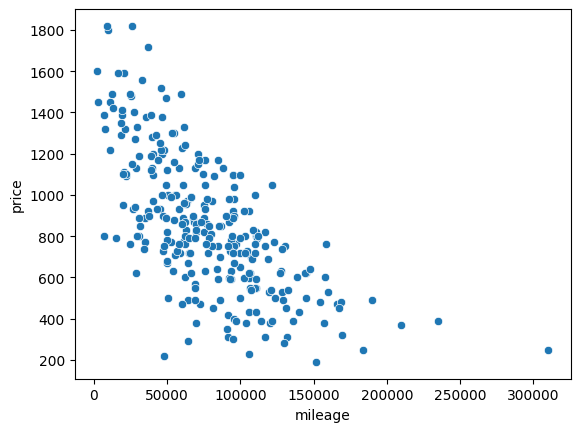

In [26]:
sns.scatterplot(x='mileage', y='price', data = df)

### 관련 도서
신호와 소음 - 불확실성 시대, 미래를 포착하는 예측의 비밀

노이즈 : 생각의 잡음 판단을 조종하는 생각의 함정

데이터는 어떻게 인생의 무기가 되는가 - 당신의 모든 선택에서 진짜 원하는 것을

# 정리
기술통계 : 평균, 중간값..

신뢰구간 : 모집단에서는 어떨까? 추론

독립표본 t 검정 : 두 집단의 평균 비교

상관분석 : 두 변수의 관계가 어떻게 되는지

# 회귀분석

In [28]:
from statsmodels.formula.api import ols
m = ols('price ~ mileage', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.81e-38
Time:                        04:10:34   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-> price=−0.0052×mileage+1258.7668 라는 공식 도출 가능

---
회귀분석에서 계수의 p-value 이용

- 귀무가설 : 모집단에서 기울기 = 0

    => 주행거리가 많든 적든 가격과는 무관

- p< 0.05 : 귀무가설 => 주행거리는 가격과 유관